In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
import time

In [2]:
#os.chdir(r"D:\Ftest\2025站点数据\处理后数据")

In [3]:
os.chdir(r"D:\Ftest\2025站点数据\3.7处理数据")

In [4]:
#os.chdir(r"D:\Ftest\2025站点数据\除去异常值后的分类数据\森林")

In [5]:
#os.chdir(r"D:\Ftest\2025站点数据\除去异常值后的分类数据\灌木")

In [6]:
#os.chdir(r"D:\Ftest\2025站点数据\8日站点数据多生态系统\草地")

In [7]:
#os.chdir(r"D:\Ftest\2025站点数据\8日站点数据多生态系统\灌丛")

In [8]:
!dir

 驱动器 D 中的卷是 DATA1
 卷的序列号是 D8D3-9426

 D:\Ftest\2025站点数据\3.7处理数据 的目录

2025/03/14  13:09    <DIR>          .
2025/03/13  17:07    <DIR>          ..
2025/03/07  20:32            17,391 2003-2010千烟洲合并后的月统计.xlsx
2025/03/07  20:32            17,646 2003-2010年禹城合并后的月统计.xlsx
2025/03/07  20:32            17,441 2003-2010年长白山合并后的月统计.xlsx
2025/03/07  20:32            17,320 2003-2010年鼎湖山合并后的月统计.xlsx
2025/03/07  20:32            16,498 2003-2010海北灌丛合并后的月统计.xlsx
2025/03/07  20:32            24,588 2003-2010西双版合并后的月统计.xlsx
2025/03/07  20:32            12,878 2004-2009海北湿地合并后的月统计.xlsx
2025/03/07  20:32            15,254 2004-2010内蒙古合并后的月统计.xlsx
2025/03/07  20:32            15,364 2004-2010年当雄合并后的月统计.xlsx
2025/03/07  20:32            11,741 2010-2014西双版纳森林合并后的月统计.xlsx
2025/03/07  20:32            13,571 2011-2020海北灌丛合并后的月统计.xlsx
2025/03/07  20:32             9,404 元江灌丛合并后的月统计.xlsx
2025/03/07  20:32            11,438 呼中森林合并后的月统计.xlsx
2025/03/07  20:32            12,506 哀牢山森林合并后的月统计.xlsx
2025/03/07  20:

In [9]:
def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     np.random.seed(seed)
     torch.backends.cudnn.deterministic = True
# 设置随机数种子
setup_seed(42)

In [10]:
dataset = []
time_window =8
input_var = 10
for site in os.listdir("."):
    #site_data = pd.read_csv(site)
    #site_data = pd.read_excel(site).to_numpy()
    site_data = pd.read_excel(site)
    print(site)
    site_data=site_data.drop(['Slope','Lai','DEM'],axis=1).values
    #site_data=site_data.drop(['Slope','Lai','DEM'],axis=1).values
    #site_data=site_data.drop(['VP'],axis=1).values
    #site_data = site_data.to_numpy()
    # 由于 site_data 现在是 NumPy 数组，不能再使用 head() 方法
    # 可以打印数组的前几行查看
   # print(site_data[:5])
    # 每个站点单独归一化,不对NEE做归一化
    #scaler = StandardScaler()
    #site_data[:,2:] = scaler.fit_transform(site_data[:,2:])
    for i in range(len(site_data) - time_window):
        window_data = site_data[i:i+time_window]
        dataset.append(window_data)

2003-2010千烟洲合并后的月统计.xlsx
2003-2010年禹城合并后的月统计.xlsx
2003-2010年长白山合并后的月统计.xlsx
2003-2010年鼎湖山合并后的月统计.xlsx
2003-2010海北灌丛合并后的月统计.xlsx
2003-2010西双版合并后的月统计.xlsx
2004-2009海北湿地合并后的月统计.xlsx
2004-2010内蒙古合并后的月统计.xlsx
2004-2010年当雄合并后的月统计.xlsx
2010-2014西双版纳森林合并后的月统计.xlsx
2011-2020海北灌丛合并后的月统计.xlsx
元江灌丛合并后的月统计.xlsx
呼中森林合并后的月统计.xlsx
哀牢山森林合并后的月统计.xlsx
宝天曼森林合并后的月统计.xlsx
小浪底森林合并后的月统计.xlsx
月统计-2015-2018年达茂通量和气象数据.xlsx
月统计2015-2020年句容站农田生态系统通量数据-zyl.xlsx
松嫩平原农田合并后的月统计.xlsx
海北草原合并后的月统计.xlsx
海南儋州森林合并后的月统计.xlsx
锦州农田合并后的月统计.xlsx


In [11]:
# 将 dataset 从列表转换为 NumPy 数组
dataset = np.array(dataset)
print(dataset.shape)
#print(dataset[:5])
#print(dataset[:,:,2:])
# 确认 dataset 已转换为 NumPy 数组
print(f"dataset 的类型: {type(dataset)}")
# 所有数据归一化
scaler = StandardScaler()
# 注意：由于 dataset 是三维数组，需要先将后两维展平进行归一化，再恢复形状
original_shape = dataset[:, :, 2:].shape
flattened = dataset[:, :, 2:].reshape(-1, original_shape[-1])
normalized_flattened = scaler.fit_transform(flattened)
dataset[:, :, 2:] = normalized_flattened.reshape(original_shape)
#print(dataset[:,:,1])

(1393, 8, 12)
dataset 的类型: <class 'numpy.ndarray'>


In [12]:
dataset = dataset[:,:,1:]#丢弃date列

In [13]:

dataset = dataset[np.random.permutation(dataset.shape[0])]
train_dataset = dataset[:int(dataset.shape[0]*0.8),:,:].astype(np.float32)
test_dataset = dataset[int(dataset.shape[0]*0.8):,:,:].astype(np.float32)
X = train_dataset[:,:,1:]
Y = train_dataset[:,time_window-1,0]


In [14]:
device = torch.device("cuda:0")
X = torch.from_numpy(X).to(device=device, dtype=torch.float32)
Y = torch.from_numpy(Y).to(device=device, dtype=torch.float32)
train_set = TensorDataset(X, Y.view(-1, 1))
train_loader = DataLoader(train_set, batch_size=128, shuffle=True)

In [15]:
class LSTMRegressor(nn.Module):
    def __init__(self, input_size=input_var, hidden_size=32, num_layers=2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        self.regressor = nn.Sequential(
            nn.Linear(hidden_size, 64, bias=True),
            nn.GELU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        if isinstance(x, torch.Tensor):
            print("Input is a Tensor")
        else:
            x=torch.from_numpy(x).to(device=device,dtype=torch.float32)
        if(x.dim()==2):
            x=x.reshape(x_in.shape[0],-1,input_var)
        # x形状: (batch_size, seq_len=42, input_size=input_var)
        lstm_out, _ = self.lstm(x)  # 输出形状: (batch, time_step, 64)
        last_output = lstm_out[:, -1, :]  # 取最后一个时间步 (batch, 64)
        return self.regressor(last_output)  # 输出形状: (batch, 1)

In [16]:
# 构建Transformer模型
class TransformerEncoder(nn.Module):
    def __init__(self, embed_dim, dense_dim, num_heads, dropout_rate):
        super(TransformerEncoder, self).__init__()

        self.mha = nn.MultiheadAttention(embed_dim, num_heads)
        self.layernorm1 = nn.LayerNorm(embed_dim)
        self.dropout1 = nn.Dropout(dropout_rate)

        self.dense1 = nn.Linear(embed_dim, dense_dim)
        self.dense2 = nn.Linear(dense_dim, embed_dim)
        self.layernorm2 = nn.LayerNorm(embed_dim)
        self.dropout2 = nn.Dropout(dropout_rate)

    def forward(self, inputs):
        attn_output, _ = self.mha(inputs, inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)

        dense_output = self.dense1(out1)
        dense_output = self.dense2(dense_output)
        dense_output = self.dropout2(dense_output)
        out2 = self.layernorm2(out1 + dense_output)

        return out2


class TransformerDecoder(nn.Module):
    def __init__(self, embed_dim, dense_dim, num_heads, dropout_rate):
        super(TransformerDecoder, self).__init__()

        self.mha1 = nn.MultiheadAttention(embed_dim, num_heads)
        self.mha2 = nn.MultiheadAttention(embed_dim, num_heads)
        self.layernorm1 = nn.LayerNorm(embed_dim)
        self.layernorm2 = nn.LayerNorm(embed_dim)
        self.layernorm3 = nn.LayerNorm(embed_dim)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.dropout3 = nn.Dropout(dropout_rate)

        self.dense1 = nn.Linear(embed_dim, dense_dim)
        self.dense2 = nn.Linear(dense_dim, embed_dim)
        self.layernorm4 = nn.LayerNorm(embed_dim)
        self.dropout4 = nn.Dropout(dropout_rate)

    def forward(self, inputs, encoder_outputs):
        attn1, _ = self.mha1(inputs, inputs, inputs)
        attn1 = self.dropout1(attn1)
        out1 = self.layernorm1(inputs + attn1)

        attn2, _ = self.mha2(out1, encoder_outputs, encoder_outputs)
        attn2 = self.dropout2(attn2)
        out2 = self.layernorm2(out1 + attn2)

        dense_output = self.dense1(out2)
        dense_output = self.dense2(dense_output)
        dense_output = self.dropout3(dense_output)
        out3 = self.layernorm3(out2 + dense_output)

        decoder_output = self.dense1(out3)
        decoder_output = self.dense2(decoder_output)
        decoder_output = self.dropout4(decoder_output)
        out4 = self.layernorm4(out3 + decoder_output)

        return out4


class Transformer(nn.Module):
    def __init__(self, num_features, embed_dim, dense_dim, num_heads, dropout_rate, num_blocks, output_sequence_length):
        super(Transformer, self).__init__()

        self.embedding = nn.Linear(num_features, embed_dim)
        self.transformer_encoder = nn.ModuleList(
            [TransformerEncoder(embed_dim, dense_dim, num_heads, dropout_rate) for _ in range(num_blocks)])
        self.transformer_decoder = nn.ModuleList(
            [TransformerDecoder(embed_dim, dense_dim, num_heads, dropout_rate) for _ in range(num_blocks)])
        self.final_layer = nn.Linear(embed_dim * time_window, output_sequence_length)
        #self.icb = ICB(num_features, dense_dim)
        #self.abs = Adaptive_Spectral_Block(num_features)
        #self.layernorm = nn.LayerNorm(num_features)
    def forward(self, inputs):
        #inputs = self.icb(inputs)
        #inputs=self.abs(inputs)
        #inputs=self.layernorm(inputs)
        encoder_inputs = inputs
        decoder_inputs = inputs
        encoder_outputs = self.embedding(encoder_inputs)
        for i in range(len(self.transformer_encoder)):
            encoder_outputs = self.transformer_encoder[i](encoder_outputs)

        decoder_outputs = self.embedding(decoder_inputs)
        for i in range(len(self.transformer_decoder)):
            decoder_outputs = self.transformer_decoder[i](decoder_outputs, encoder_outputs)

        decoder_outputs = decoder_outputs.view(-1, decoder_outputs.shape[1] * decoder_outputs.shape[2])
        decoder_outputs = self.final_layer(decoder_outputs)
        #decoder_outputs = decoder_outputs.view(-1, T)
        decoder_outputs = decoder_outputs.view(-1,1)

        return decoder_outputs

In [17]:
# 新增系列显著性模块,改进后的双扰动版本
class SeriesSaliencyModule(nn.Module):
    def __init__(self, input_size, seq_len, sigma1=0.1, sigma2=0.5):
        super().__init__()
        self.mask = nn.Parameter(torch.ones(seq_len, input_size))  # 可学习掩码
        self.sigma1 = sigma1  # 噪声标准差
        self.sigma2 = sigma2  # 模糊参数
    def forward(self, x, training=True):
        """
        x shape: (batch_size, seq_len, input_size)
        """
        if training:
            # 生成两种扰动版本
            x_noise = x + torch.randn_like(x) * self.sigma1
            x_blur = self.gaussian_blur(x, kernel_size=3, sigma=self.sigma2)
            e = torch.ones_like(self.mask)
            # 混合原始和扰动数据
            mixed_x = self.mask * x_noise + (e - self.mask) * x_blur
            return mixed_x
        else:
            # 解释阶段直接返回掩码
            return self.mask.data
 
    def gaussian_blur(self, x, kernel_size=2, sigma=0.5):
        # 简化版高斯模糊实现
        kernel = self._gaussian_kernel(kernel_size, sigma).to(x.device)
        kernel = kernel.view(1, 1, kernel_size).repeat(x.shape[2], 1, 1)
        return torch.nn.functional.conv1d(
            x.permute(0,2,1), 
            kernel, 
            padding=kernel_size//2,
            groups=x.shape[2]
        ).permute(0,2,1)
 
    def _gaussian_kernel(self, size, sigma):
        coords = torch.arange(size).float() - size//2
        g = torch.exp(-(coords**2) / (2 * sigma**2))
        return g / g.sum()
 
   

# 定义CNN模型，加入系列显著性模块
class CNNRegressor(nn.Module):
    def __init__(self, input_size, seq_len=time_window, kernel_size=3, stride=1, padding=1):
        super().__init__()
        self.saliency_module = SeriesSaliencyModule(input_size, seq_len)
        
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=32, kernel_size=kernel_size,
                               stride=stride, padding=padding)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=kernel_size,
                               stride=stride, padding=padding)
        self.relu2 = nn.ReLU()
        self.flattened_size = self._calculate_flattened_size(seq_len)
        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 1)
    
        
    def forward(self, x):
        if not isinstance(x, torch.Tensor):
            x=torch.from_numpy(x).to(device=device,dtype=torch.float32)   
        #else:
             #print("Input is a Tensor")
        if(x.dim()==2):
            x=x.reshape(x.shape[0],-1,input_var)
        x = self.saliency_module(x)
        x = x.permute(0, 2, 1)
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

    def _calculate_flattened_size(self, seq_len):
        x = torch.randn(1, self.conv1.in_channels, seq_len)
        x = self.conv1(x)
        x = self.conv2(x)
        return x.view(1, -1).size(1)

# 生成参考系列图像（简单加噪示例）
# 修改参考序列生成函数
#def generate_reference_x(x):
    #noise = torch.randn_like(x) * 0.1
    #return x + noise

In [18]:
epochs = 3000
#epochs = 4000
learning_rate = 1e-4
net = CNNRegressor(input_size=input_var).to(device=device)
#net = LSTMRegressor(input_size=input_var).to(device=device)
#net = Transformer(num_features=input_var,embed_dim=32, dense_dim=64, num_heads=2,
                  #dropout_rate=0.001, num_blocks=1, output_sequence_length=1).to(device=device) #网络的初始化
optimizer = torch.optim.AdamW(net.parameters(), lr=learning_rate, weight_decay=1e-4)
# 新增正则化参数
lambda1 = 0.1  # 掩码L2正则
lambda2 = 0.01 # 正交正则
torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=3000, eta_min=0)
Loss = nn.MSELoss()
#Loss=custom_loss(pred_y, train_y, net.saliency_module.mask)
MinTrainLoss = 1e10
train_loss = []

In [19]:
start = time.time()
start0 = time.time()
net.train()
for epoch in range(epochs):
    train_epoch_loss = 0
    
    for i, (train_x, train_y) in enumerate(train_loader):
        #train_x_hat = generate_reference_x(train_x)
        #train_x_hat = generate_reference_x(train_x)  # 传入当前epoch
        optimizer.zero_grad()
        #print(train_x.shape)
        #print(train_x_hat.shape)
        pred_y = net(train_x)
        ## 正则化项
        mask = net.saliency_module.mask
        l2_reg = lambda1 * torch.norm(mask, p=2)
        ortho_reg = lambda2 * torch.norm(mask @ mask.T - torch.eye(mask.shape[0]).to(device), p='fro')
        #####
        loss = Loss(pred_y, train_y)
        #
        #loss = loss + l2_reg + ortho_reg
        loss.backward()
        optimizer.step()
        train_epoch_loss += loss.cpu().item()
    train_epoch_loss /= len(train_loader)
    if epoch % 10 == 0:
        end = time.time()
        print("epoch:[%5d/%5d] time:%.2fs current_loss:%.5f"
              % (epoch, epochs, (end - start), train_epoch_loss))
        start = time.time()
    train_loss.append(train_epoch_loss)
    if train_loss[-1] < MinTrainLoss:
        torch.save(net.state_dict(), "../model_param/double_mask_CNN_model_for_Fanhuan.pth")
        MinTrainLoss = train_loss[-1]
end0 = time.time()
print("训练总用时: %.2fmin" % ((end0 - start0) / 60))
# 训练过程中添加监控
#with torch.no_grad():
#    mask_values = torch.sigmoid(net.saliency_module.mask).cpu().numpy()
#    plt.figure(figsize=(10,4))
#    plt.subplot(121)
#    #plt.imshow(mask_values[0].T, cmap='viridis')  # 特征-时间维度
#    plt.imshow(mask_values.T, cmap='viridis')  # 特征-时间维度
#    plt.colorbar()
#    
#    plt.subplot(122)
#    plt.hist(mask_values.flatten(), bins=20)
#    plt.show()
## 可视化mask的演变
#if epoch % 100 == 0:
#    plt.imshow(net.saliency_module.mask.detach().cpu().squeeze().numpy())
#    plt.title(f"Epoch {epoch} Mask")
#    plt.show()
## 添加梯度监控
#for name, param in net.named_parameters():
#    if param.grad is not None:
#        print(f"{name} grad mean: {param.grad.mean().item():.4f}, std: {param.grad.std().item():.4f}")


epoch:[    0/ 3000] time:0.32s current_loss:7512.56141
epoch:[   10/ 3000] time:0.30s current_loss:6927.44721
epoch:[   20/ 3000] time:0.30s current_loss:6399.02151
epoch:[   30/ 3000] time:0.32s current_loss:5434.41612
epoch:[   40/ 3000] time:0.29s current_loss:5143.97057
epoch:[   50/ 3000] time:0.30s current_loss:4454.72618
epoch:[   60/ 3000] time:0.29s current_loss:4151.55447
epoch:[   70/ 3000] time:0.29s current_loss:3827.57551
epoch:[   80/ 3000] time:0.32s current_loss:3820.63845
epoch:[   90/ 3000] time:0.31s current_loss:3599.99164
epoch:[  100/ 3000] time:0.28s current_loss:3407.17707
epoch:[  110/ 3000] time:0.32s current_loss:3343.70142
epoch:[  120/ 3000] time:0.30s current_loss:3257.37396
epoch:[  130/ 3000] time:0.30s current_loss:3123.23587
epoch:[  140/ 3000] time:0.30s current_loss:3071.39003
epoch:[  150/ 3000] time:0.29s current_loss:2967.52736
epoch:[  160/ 3000] time:0.29s current_loss:2951.79289
epoch:[  170/ 3000] time:0.29s current_loss:2825.05028
epoch:[  1

Text(0, 0.5, 'loss')

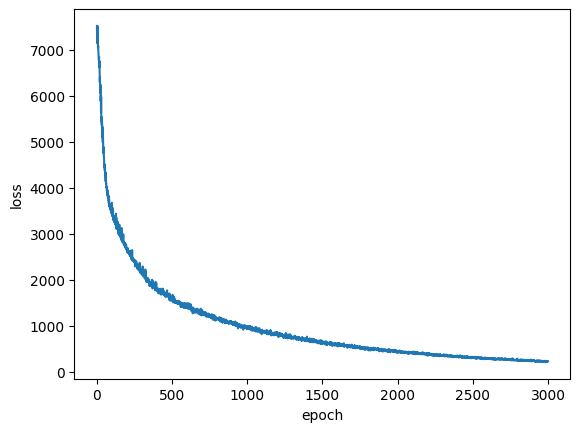

In [20]:
plt.plot(range(epochs),train_loss)
#print(train_loss)
plt.xlabel("epoch")
plt.ylabel("loss")

In [21]:
net.load_state_dict(torch.load("../model_param/double_mask_CNN_model_for_Fanhuan.pth",map_location=device))#pytoch 导入模型

<All keys matched successfully>

In [22]:
# net.load_state_dict(torch.load("model1.pth",map_location=device))#pytoch 导入模型
test_dataset = torch.from_numpy(test_dataset).to(dtype=torch.float32)
test_dataset = test_dataset.to(device=device)
net.eval()#这里指评价模型，不反传，所以用eval模式
with torch.no_grad():
    pre_y = net(test_dataset[:,:,1:])
pre_y = pre_y.detach().cpu().numpy()#输出结果torch tensor，需要转化为numpy类型来进行可视化
print(pre_y.shape)
test_dataset = test_dataset.cpu().numpy()
x = test_dataset[:,time_window-1,0].squeeze() 
y = pre_y.squeeze()

(279, 1)


0.8474575281143188


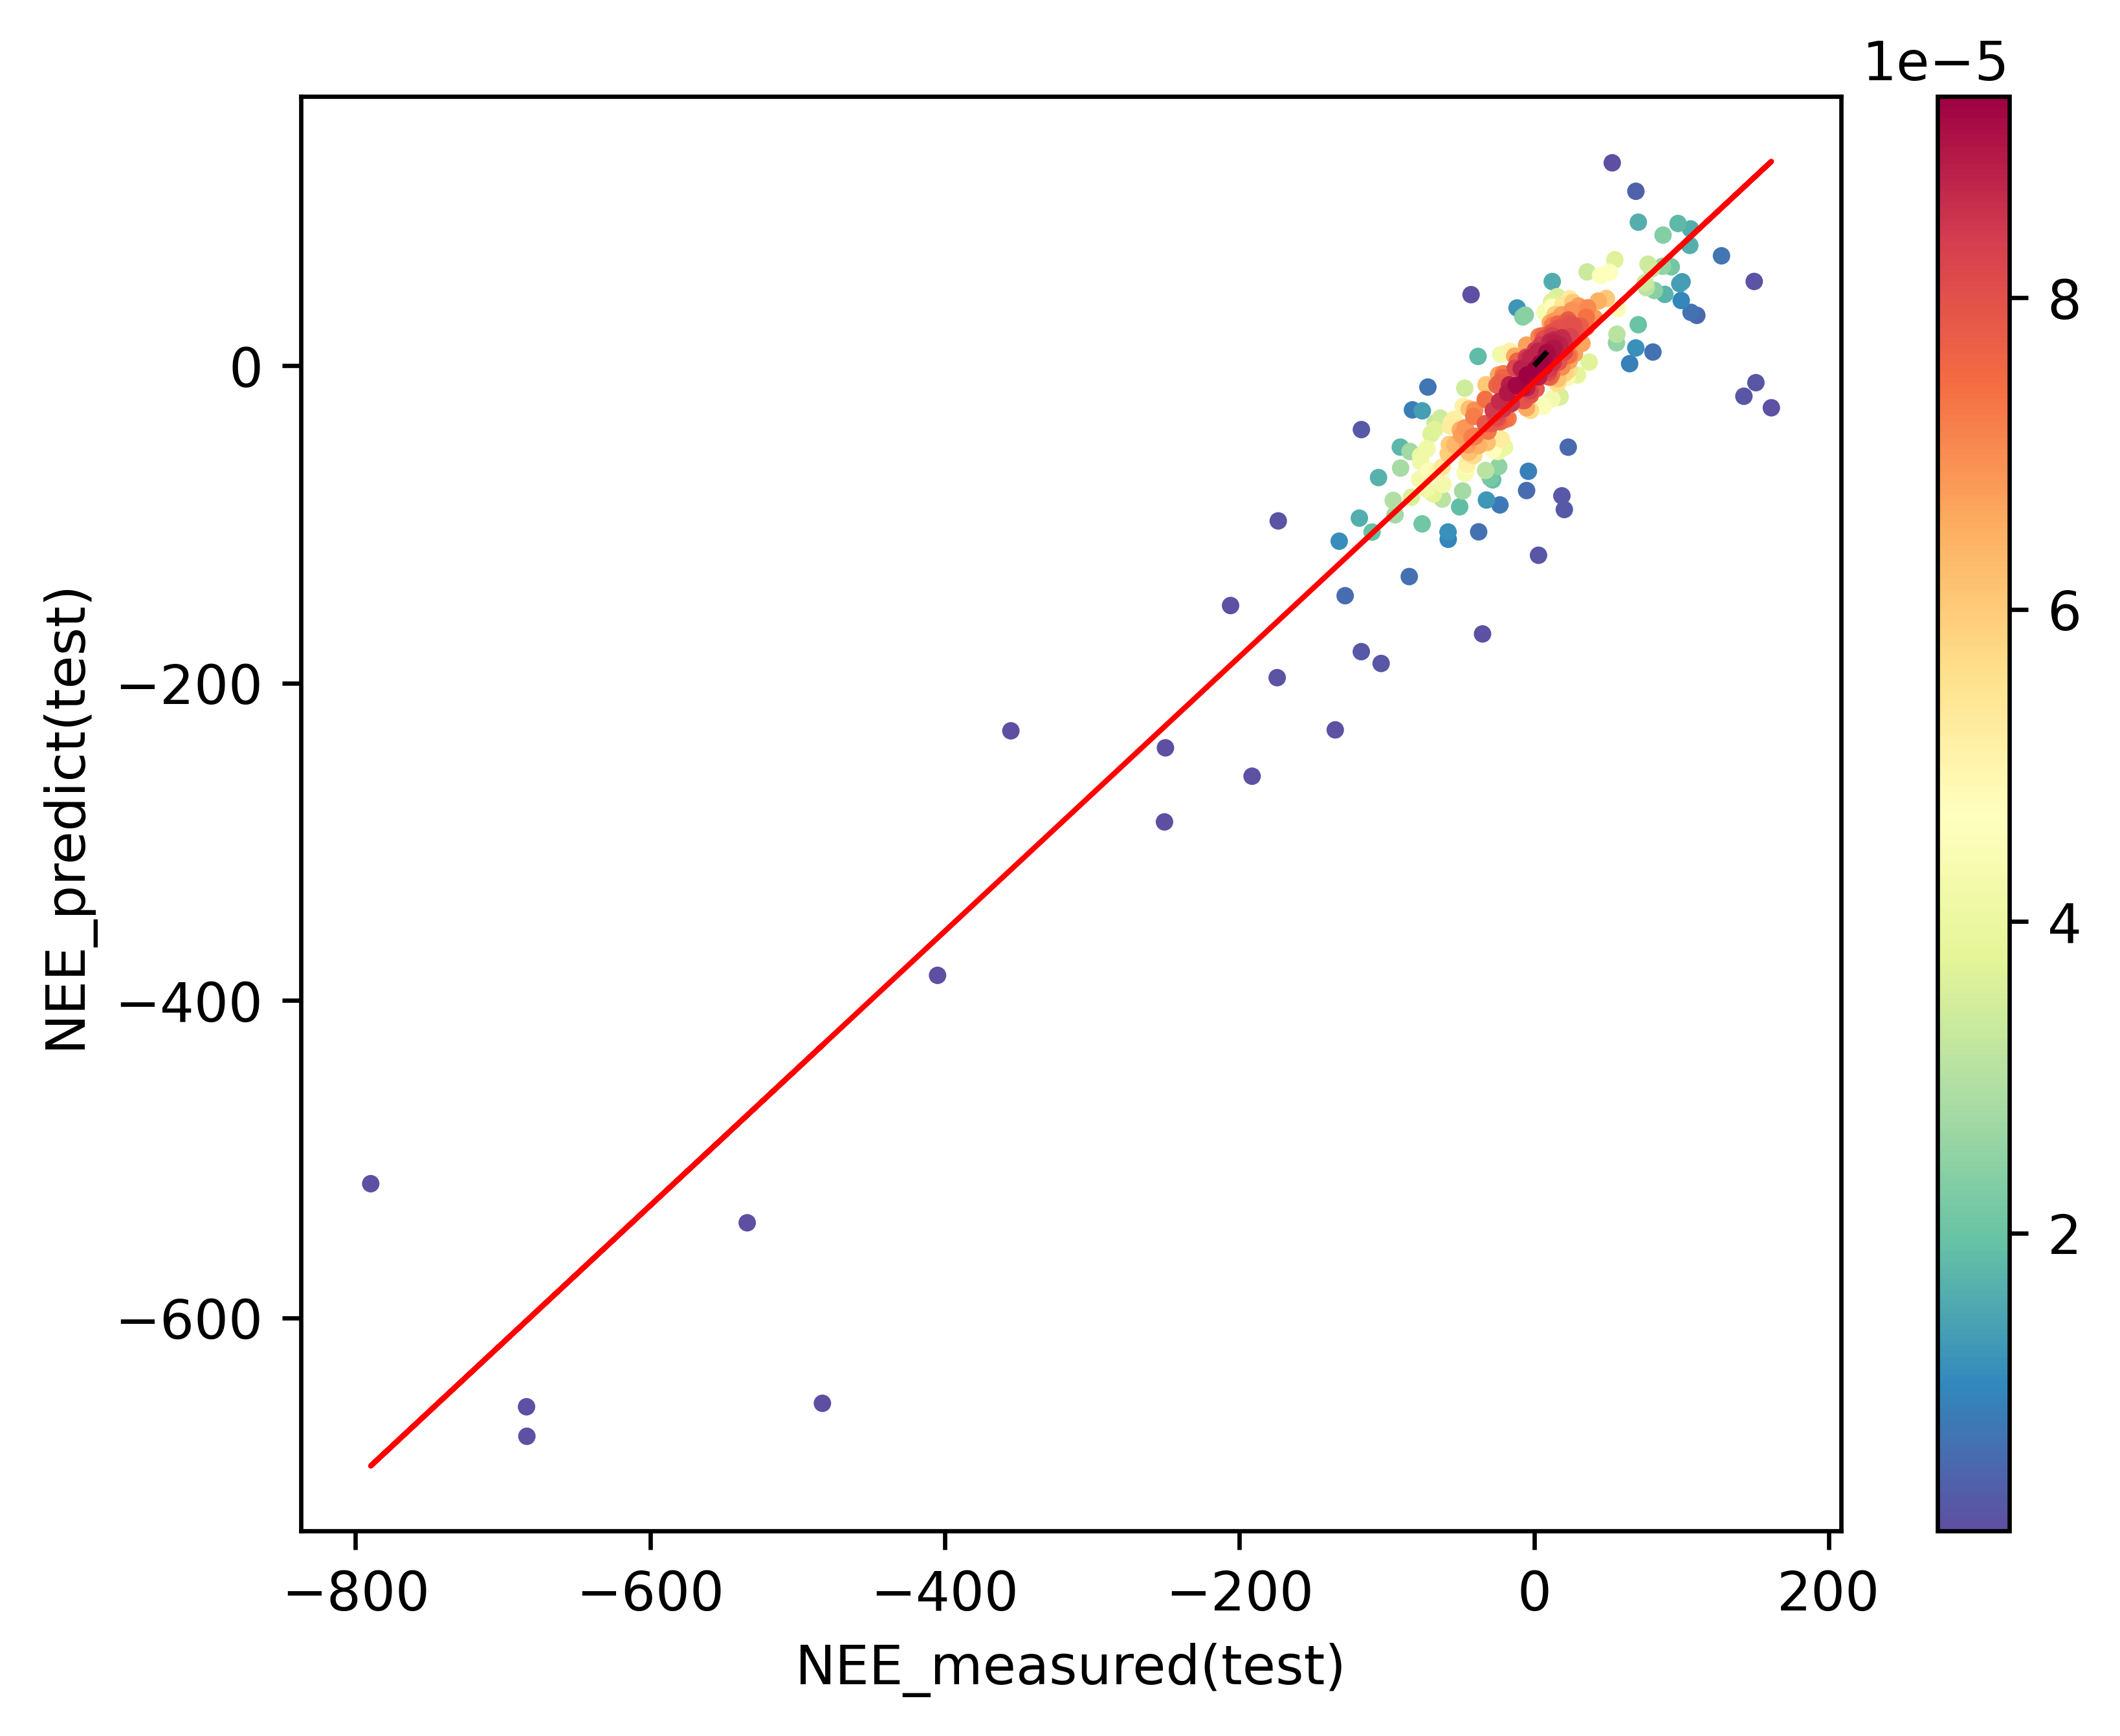

In [23]:
from scipy.stats import gaussian_kde
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error,explained_variance_score
from tqdm import tqdm
from timm.layers import trunc_normal_
xy = np.vstack([x,y])  #  将两个维度的数据叠加
z = gaussian_kde(xy)(xy)  # 建立概率密度分布，并计算每个样本点的概率密度

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots(dpi=600)
plt.scatter(x, y,c=z, s=5,cmap='Spectral_r') # c表示标记的颜色
plt.colorbar()

z = np.polyfit(x, y, 1) 
p = np.poly1d(z) 

plt.plot(x,p(x),markerfacecolor='r',linewidth=1,color='red')

std_x = np.arange(10)
std_y = std_x

plt.xlabel("NEE_measured(test)")
plt.ylabel("NEE_predict(test)")
plt.plot(std_x,std_y,linestyle='--',linewidth=1,color='black')
r2=r2_score(x,y)
print(r2)

In [24]:
rmse=np.sqrt(mean_squared_error(x,y))
print(rmse)

41.98699895270782


In [25]:
mae=mean_absolute_error(x,y)
print(mae)

26.350122451782227


In [26]:
y_test=x
y_pred=y

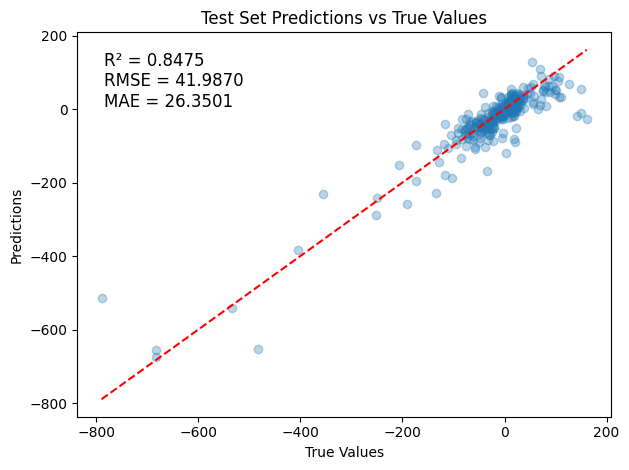

In [27]:
#plt.figure(figsize=(12, 5))

#plt.subplot(1,2, 1)
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.text(0.05, 0.95, f'R² = {r2:.4f}\nRMSE = {rmse:.4f}\nMAE = {mae:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Test Set Predictions vs True Values')
#plt.text(0.05, 0.95, f'R² = {0.7280:.4f}\nRMSE = {44.3021:.4f}\nMAE = {26.1644:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
#plt.savefig(r"D:\毕业论文\新结结果\V2-ALL.jpg",dpi=300)
#plt.savefig("../pic/LSTM-result1.jpg",dpi=300)
#plt.savefig(r"D:\毕业论文\最新论文图\Dmask\森林.jpg",dpi=300)
plt.tight_layout()
plt.show()

In [28]:
def auto_normalize(mask):
    mask_np = mask.cpu().numpy() 
    return (mask_np - np.min(mask_np))  / (np.max(mask_np)  - np.min(mask_np)  + 1e-8)

In [29]:
#显著性可视化
 
#关键特征识别
def get_key_features(model, topk=5):
    model.eval()
    with torch.no_grad():
        mask = model.saliency_module.mask.detach().sigmoid()
    feature_importance = mask.mean(dim=0)  # 各特征平均重要性
    topk_idx = torch.topk(feature_importance, topk).indices
    return topk_idx  # 返回最重要特征索引
#时序模式分析
def temporal_pattern_analysis(model, dataloader):
    all_masks = []
    for x, _ in dataloader:
        mask = model.saliency_module(x, training=False)
        all_masks.append(mask.mean(dim=1))  # 各时间步重要性
        
    #temporal_imp = torch.cat(all_masks).mean(dim=0)
    # 合并所有批次的时间重要性
    temporal_imp = torch.stack(all_masks).mean(dim=0)  # (T,)
    plt.plot(temporal_imp.cpu().numpy())
    plt.title("Temporal Importance Pattern")


In [30]:
top_features = get_key_features(net)
print("关键特征索引:", top_features)
# 输出: tensor([3, 0, 5]) 对应温度、PAR、土壤湿度

关键特征索引: tensor([4, 1, 9, 2, 6], device='cuda:0')


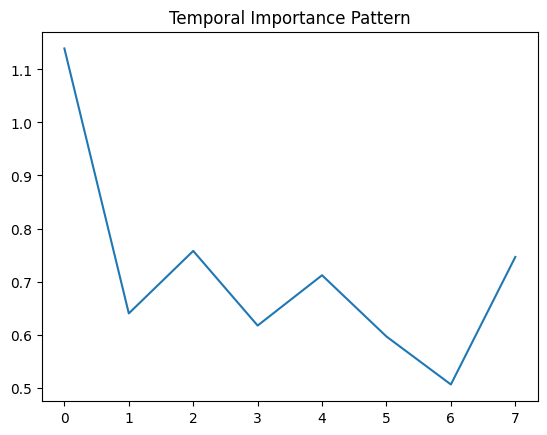

In [31]:
temporal_pattern_analysis(net, train_loader)

In [32]:
# 解释性分析函数
def interpret_saliency(model, sample):
    model.eval()
    with torch.no_grad():
        # 获取显著性掩码
        saliency_map = model.saliency_module(sample.unsqueeze(0), training=False)
        return saliency_map.squeeze().cpu().numpy()

# 可视化示例
def visualize_saliency(sample, saliency_map, time_steps=None, feature_names=['Ta', 'Ma', 'Rd', 'Rn', 'PAR', 'Tsoil', 'P', 'NDVI', 'EVI', 'Fpar']):
    # 原始数据
    plt.subplot(2, 1, 1)
    plt.imshow(sample.cpu().numpy().T, aspect='auto')#.T转置
    plt.title("Original Features")
    """
    saliency_map: 形状为 (时间步数, 特征数) 的矩阵
    """
    plt.figure(figsize=(10, 6))
    
    # 调整坐标轴方向
    plt.imshow(#saliency_map.T, 
               saliency_map,
               aspect='auto', 
               cmap='viridis',
               origin='lower',  # 关键修改：y轴原点在左下
               extent=[0, saliency_map.shape[0], 0, saliency_map.shape[1]])  # [xmin, xmax, ymin, ymax]
    
    # 坐标轴标注
    plt.xlabel("Time Step", fontsize=12)
    plt.ylabel("Feature Index", fontsize=12)
    plt.title("Saliency Map (Time vs Feature)", pad=20)
    
    # 自定义刻度（示例）
    if time_steps is not None:
        plt.xticks(np.arange(saliency_map.shape[0]), 
                   labels=time_steps,
                   rotation=45)
    if feature_names is not None:
        plt.yticks(np.arange(saliency_map.shape[1]), 
                   labels=feature_names)
    
    # 添加颜色条
    cbar = plt.colorbar()
    cbar.set_label("Importance Score", rotation=270, labelpad=15)
    
    plt.tight_layout()
    plt.show()

#def visualize_saliency(sample, saliency_map):
#    plt.figure(figsize=(12, 6))
    
    # 原始数据
#    plt.subplot(2, 1, 1)
#    plt.imshow(sample.cpu().numpy().T, aspect='auto')#.T转置
#    plt.title("Original Features")
    
    # 显著性图
#    plt.subplot(2, 1, 2)
#    plt.imshow(saliency_map.T, aspect='auto', cmap='viridis')
#    plt.title("Saliency Map")
#    plt.colorbar()
    
#    plt.tight_layout()
#    plt.show()

In [33]:
test_X = test_dataset[:, :, 1:]
test_Y = test_dataset[:, time_window - 1, 0]
test_X = torch.from_numpy(test_X).to(device=device, dtype=torch.float32)
test_Y = torch.from_numpy(test_Y).to(device=device, dtype=torch.float32)

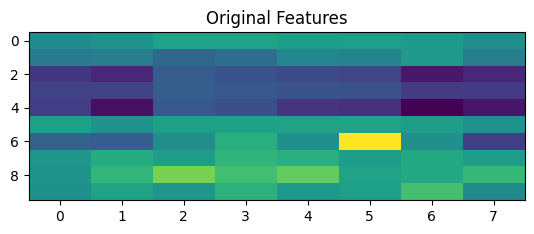

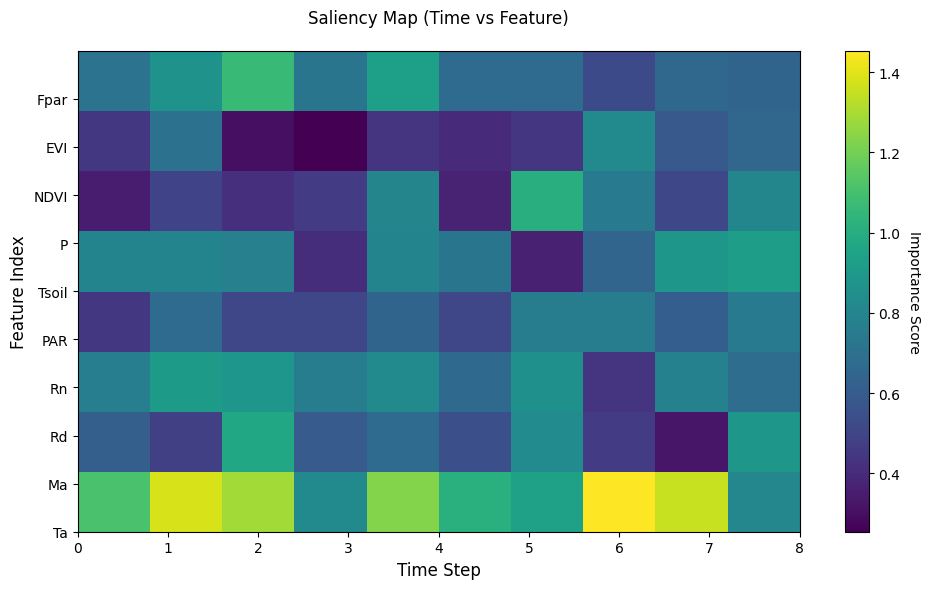

In [34]:
# 解释性分析
#test_sample = test_dataset[0][:, 1:].  # 取第一个测试样本
test_sample = test_X[155] # 取第一个测试样本
saliency = interpret_saliency(net, test_sample)
visualize_saliency(test_sample, saliency)

In [35]:
test_dataset = torch.from_numpy(test_dataset).to(device=device, dtype=torch.float32)

In [36]:
def predict(test_dataset):
    #test_dataset=torch.form_numpy(test_dataset)
    with torch.no_grad():
        net.eval()
        pre_y = net(test_dataset.reshape(-1,time_window,input_var))
        return pre_y.cpu().numpy()

In [37]:
import shap

In [38]:
background_data = test_dataset[:200, :, 1:].cpu().numpy()  # 先转CPU 
background_data = background_data.reshape(200,  -1)  # 展平维度 [200, seq*features]
explainer = shap.KernelExplainer(predict, background_data)

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [39]:
shap_values = explainer.shap_values(background_data)

  0%|          | 0/200 [00:00<?, ?it/s]

In [48]:
#feature_names = ['Ta', 'Ma', 'Rd', 'Rn', 'PAR', 'Tsoil', 'P', 'NDVI', 'EVI', 'Fpar', 'Lai', 'DEM', 'Slope']
features_names = ['Ta', 'Ma', 'Rd', 'Rn', 'PAR', 'Tsoil', 'P', 'NDVI', 'EVI', 'Fpar']
#features_names = ['Ta', 'Ma',  'Rn', 'PAR', 'Tsoil', 'Lai','Fpar', 'EVI', 'NDVI','P']
#print(np.array(shap_values))
print(np.array(shap_values).shape)
print(len(features_names))

(200, 8, 10)
10


In [49]:
# 将SHAP值转为（batch, seq_len, num_features）格式
shap_values=shap_values.squeeze().reshape(-1,time_window,input_var)
shap_array = np.array(shap_values) 

#if len(shap_array.shape)  == 4:  # 多输出模型的情况
#    shap_array = shap_array.mean(0)   # 取预测维度的平均

# 聚合方法（按时间步和特征维度）
abs_shap = np.abs(shap_array).mean(0)   # (seq_len, num_features)
std_shap = np.std(shap_array,  axis=0)  # 计算标准差

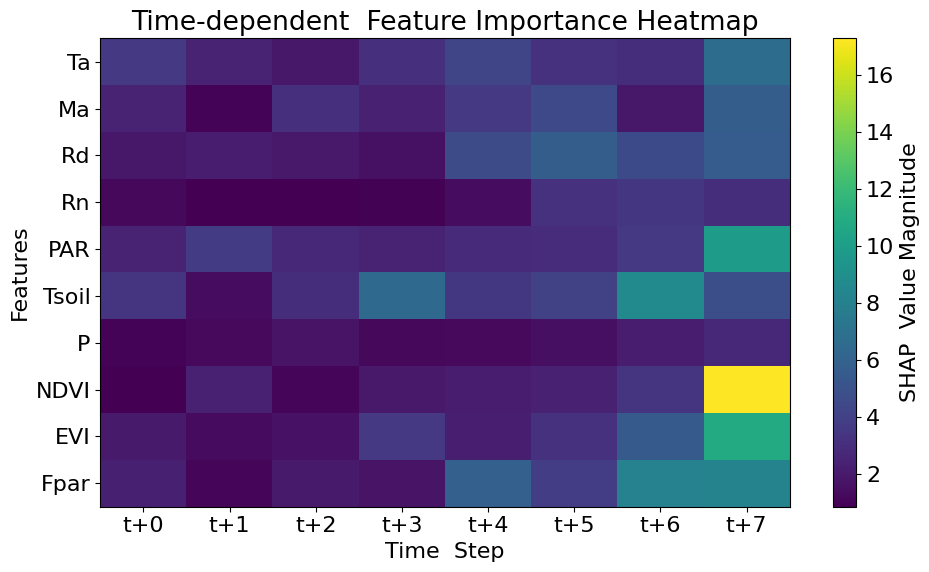

In [50]:
plt.figure(figsize=(10,  6))
plt.imshow(abs_shap.T,  cmap='viridis', aspect='auto')  # 转置矩阵
#plt.imshow(abs_shap.T,  cmap=cmap_genetic,  # ← 核心替换参数 
#                aspect='auto',
#                norm=PowerNorm(gamma=0.3),  # 非线性色阶映射 
#                interpolation='nearest')  # 保持像素锐利度 
plt.colorbar(label='SHAP  Value Magnitude')
plt.xlabel('Time  Step')
plt.ylabel('Features') 
plt.xticks(np.arange(time_window),  [f't+{i}' for i in range(time_window)])
plt.yticks(np.arange(input_var),  features_names)
plt.title('Time-dependent  Feature Importance Heatmap')
plt.tight_layout() 

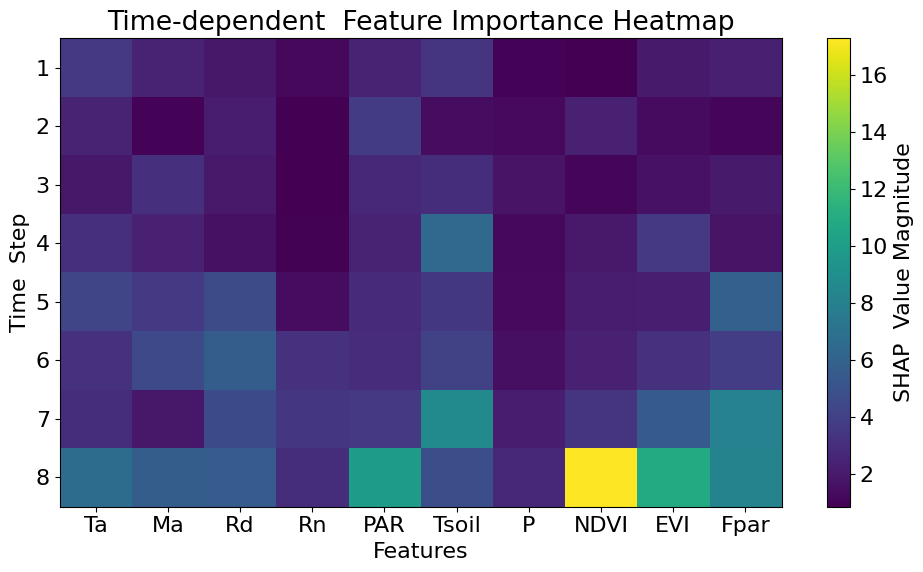

In [51]:
plt.figure(figsize=(10,  6))
plt.imshow(abs_shap, cmap='viridis', aspect='auto')  
plt.colorbar(label='SHAP  Value Magnitude')
plt.ylabel('Time  Step')
plt.xlabel('Features') 
#plt.yticks(np.arange(time_window),  [f't+{i}' for i in range(time_window)])
plt.yticks(np.arange(time_window),  [f'{1+i}' for i in range(time_window)])
plt.xticks(np.arange(input_var),  features_names)
plt.title('Time-dependent  Feature Importance Heatmap')
plt.tight_layout() 
#plt.show()

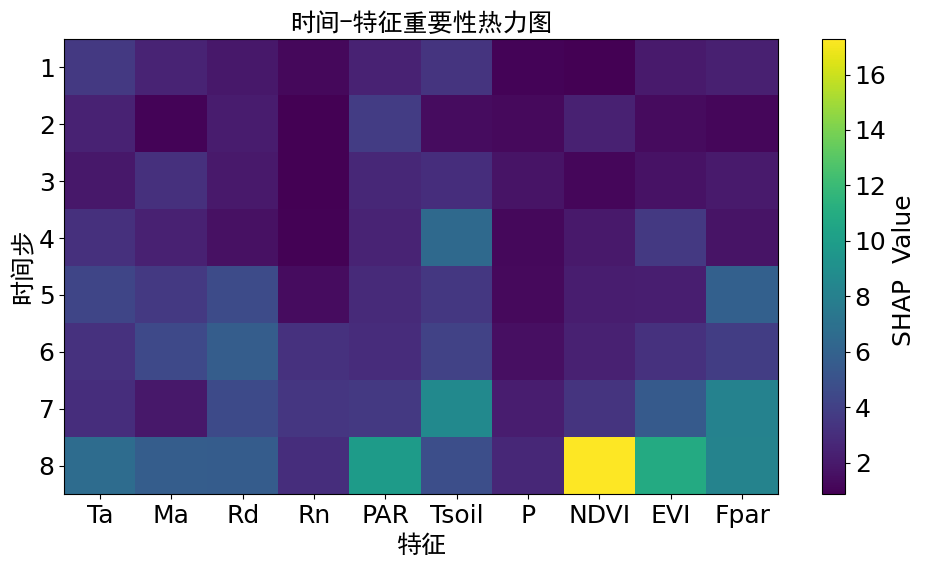

In [53]:
import matplotlib.font_manager as fm
plt.rcParams['font.size'] = 18
font_path = "C:\\Windows\\Fonts\\simhei.ttf"  # 确保此字体存在
times_font_path = "C:/Windows/Fonts/times.ttf"  # Windows 可能的路径
my_font = fm.FontProperties(fname=font_path)
times_font = fm.FontProperties(fname=times_font_path)
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 设置字体大小

plt.figure(figsize=(10,  6))
plt.imshow(abs_shap, cmap='viridis', aspect='auto')  
plt.colorbar(label='SHAP  Value ')
plt.ylabel('时间步',fontproperties=my_font)
plt.xlabel('特征',fontproperties=my_font) 
#plt.yticks(np.arange(time_window),  [f't+{i}' for i in range(time_window)])
plt.yticks(np.arange(time_window),  [f'{1+i}' for i in range(time_window)])
plt.xticks(np.arange(input_var),  features_names)
plt.title('时间-特征重要性热力图',fontproperties=my_font)
plt.tight_layout() 
plt.savefig(r"D:\毕业论文\最新论文图\第四章\特征热力图.jpg",dpi=600)

torch.Size([200, 8, 10])
(200, 10)
torch.Size([200, 10])


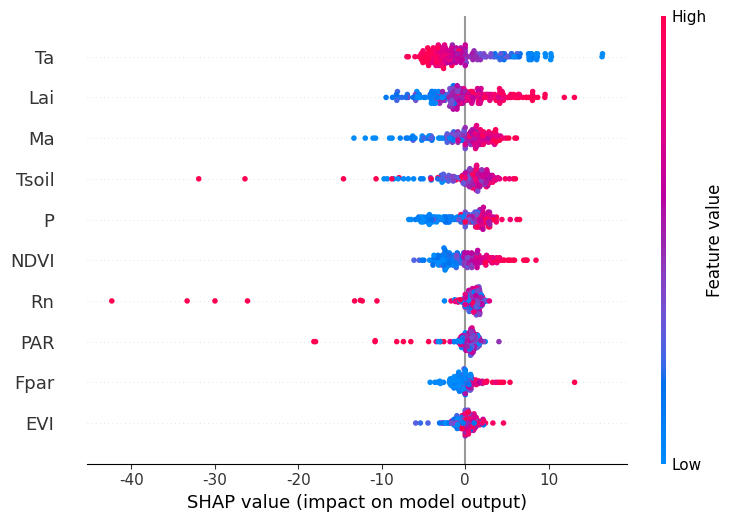

(200, 10)
torch.Size([200, 10])


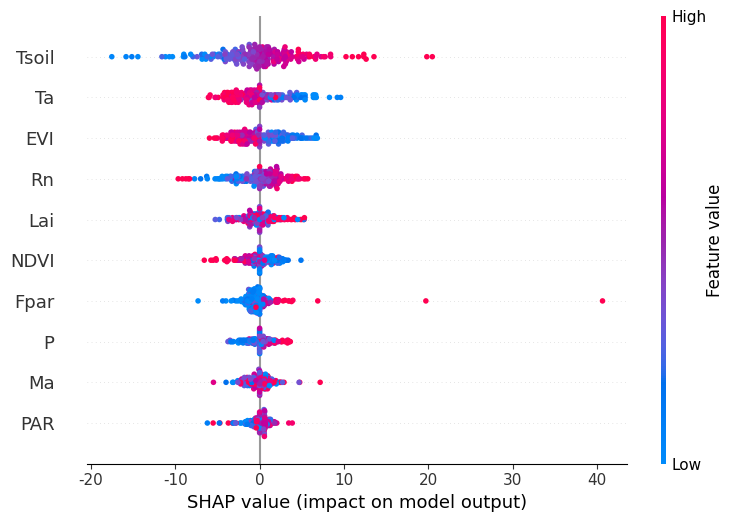

(200, 10)
torch.Size([200, 10])


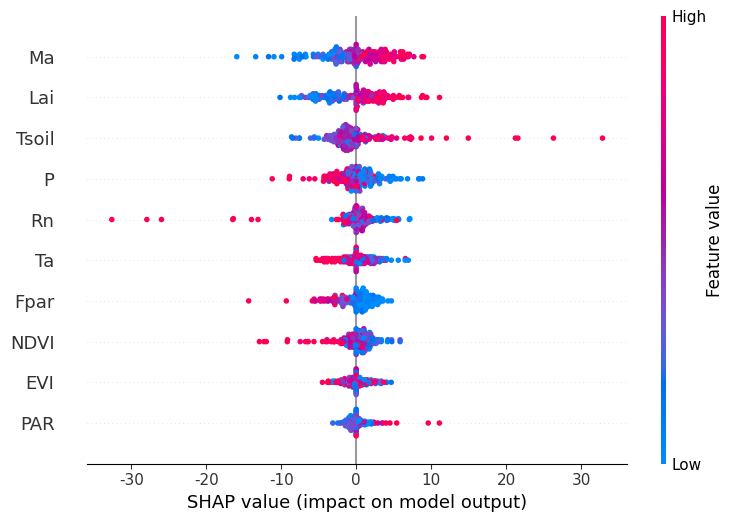

(200, 10)
torch.Size([200, 10])


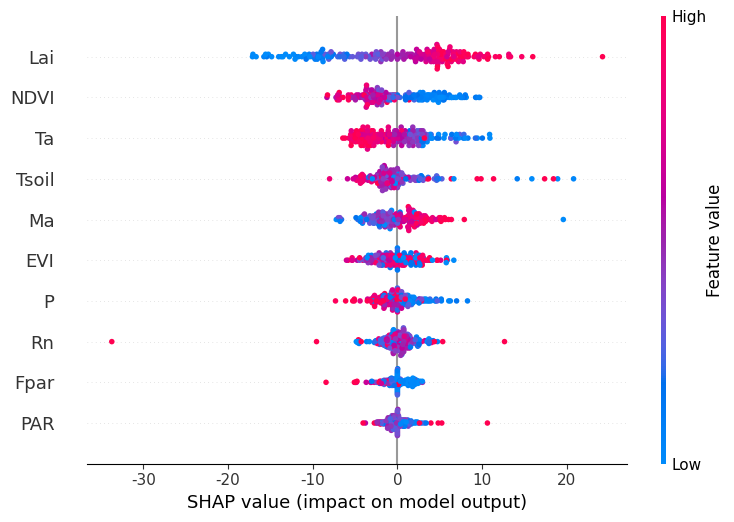

(200, 10)
torch.Size([200, 10])


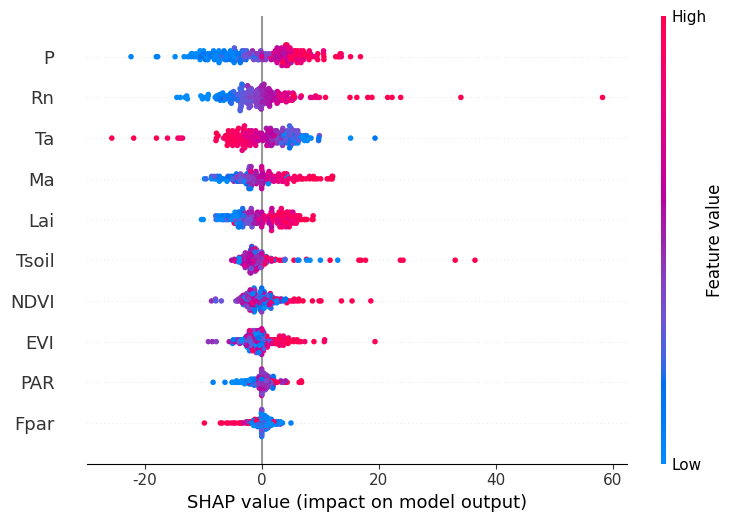

(200, 10)
torch.Size([200, 10])


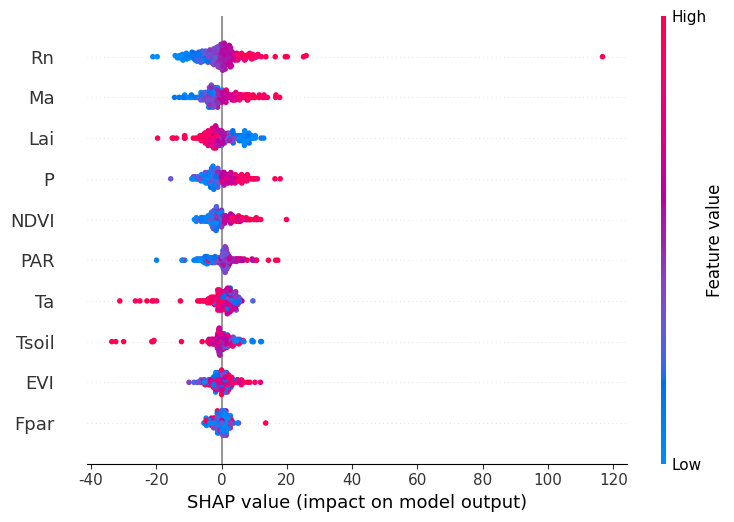

(200, 10)
torch.Size([200, 10])


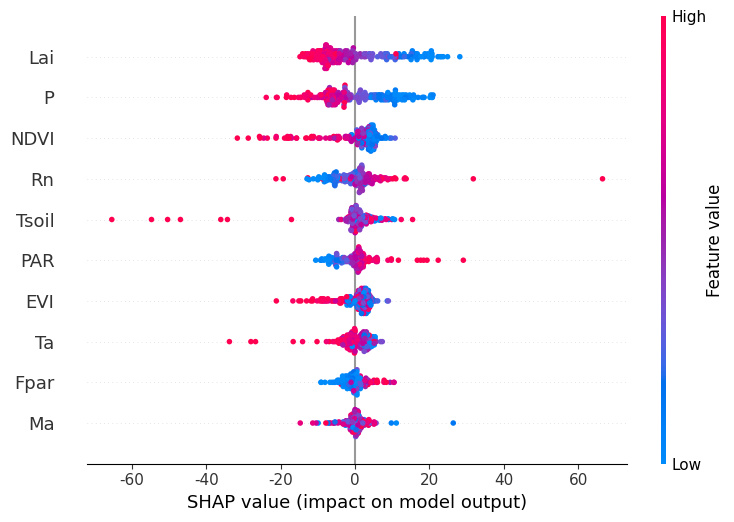

(200, 10)
torch.Size([200, 10])


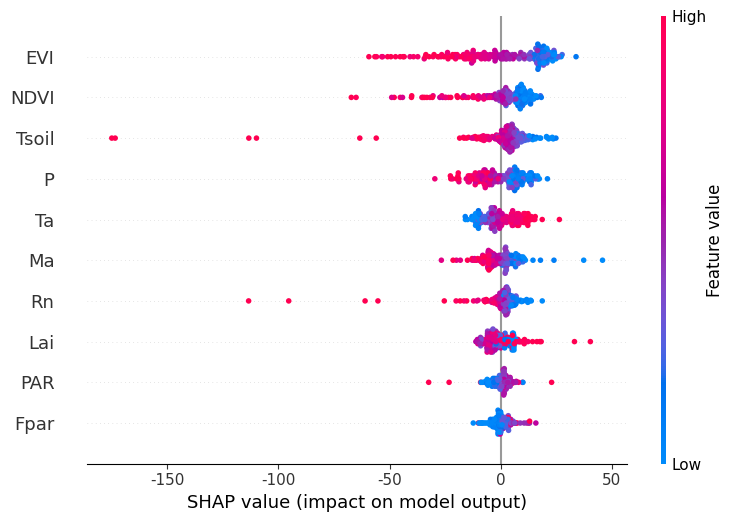

In [45]:
# 按时间步分别绘制 SHAP 摘要图
print(test_dataset[:200, :, 1:].shape)
test1=test_dataset[:200, :, 1:]
for time_step in range(shap_values.shape[1]):
    # 提取当前时间步的 SHAP 值
    #time_step_shap_values = shap_values[:, time_step, :, 0]
    time_step_shap_values = shap_values[:, time_step, :]
    print(time_step_shap_values.shape)
    # 提取当前时间步的特征值
    feature_values = test1[:, time_step, :].reshape(200, -1)
    print(feature_values.shape)
    # 这里假设 test_dataset 不需要按时间步区分，你可以根据实际情况调整
    shap.summary_plot(time_step_shap_values,feature_values.cpu().numpy(),
                      feature_names=features_names, 
                      title=f'SHAP Summary Plot for Time Step {time_step}')

(200, 10)
torch.Size([200, 8, 10])
(200, 10)


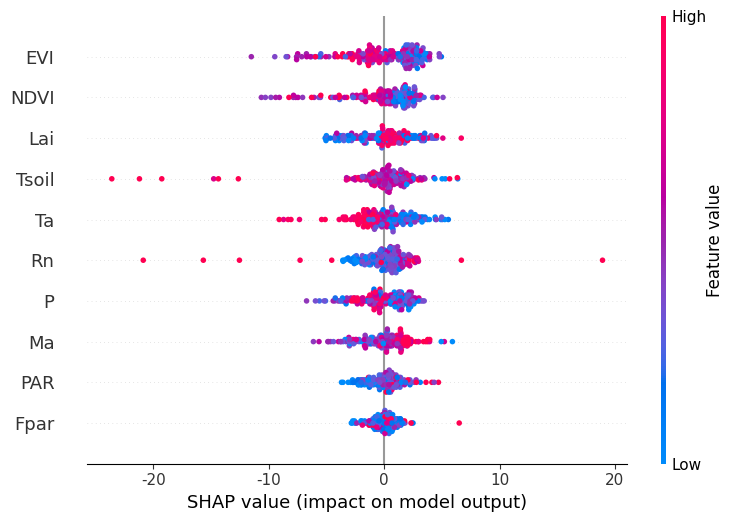

In [46]:
# 对时间步求平均后绘制 SHAP 摘要图
shap_values_arr = np.array(shap_values)  # 假设 shap_values 已经获取
# 对时间步求平均
average_shap_values = np.mean(shap_values_arr, axis=1).squeeze()
print(average_shap_values.shape)
print(test1.shape)
average_test_dataset = np.mean(test1.cpu().numpy(), axis=1).squeeze()
print(average_test_dataset.shape)
# 绘制综合的 SHAP 摘要图
shap.summary_plot(average_shap_values, average_test_dataset.reshape(200, -1), 
                  feature_names=features_names, 
                  title='SHAP Summary Plot (Averaged over Time Steps)')

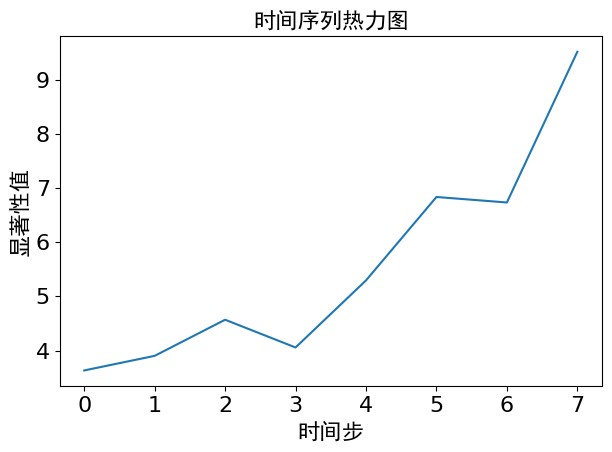

In [47]:
import matplotlib.font_manager as fm
font_path = "C:\\Windows\\Fonts\\simhei.ttf"  # 确保此字体存在
times_font_path = "C:/Windows/Fonts/times.ttf"  # Windows 可能的路径
my_font = fm.FontProperties(fname=font_path)
times_font = fm.FontProperties(fname=times_font_path)
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 设置字体大小
plt.rcParams['font.size'] = 16
def saliency_map(model, input_data):
    input_data.requires_grad = True
    output = model(input_data)
    
    # 对输出进行反向传播
    model.zero_grad()
    output.backward(torch.ones_like(output))
    
    # 获取输入的梯度
    saliency = input_data.grad.abs().cpu().data.numpy()

    # 假设 saliency 的形状是 (batch_size, time_step, channel)
    # 选择所有批次和所有时间步的第一个通道
    saliency_first_channel = saliency[:, :, 0]

    # 对所有批次的显著性图在每个时间步上求平均
    mean_saliency = np.mean(saliency_first_channel, axis=0)  # 对第一维 (batch_size) 求平均

    # 绘制平均显著性图
    plt.plot(mean_saliency)  # 横坐标是时间步，纵坐标是所有批次在该时间步的平均显著性值
    #plt.title("Time-Series Saliency Map (Averaged over all batches, first channel)")
    plt.title("时间序列热力图",fontproperties=my_font)
    plt.xlabel("时间步",fontproperties=my_font)
    plt.ylabel("显著性值",fontproperties=my_font)
    #plt.show()
    plt.tight_layout() 
    plt.savefig(r"D:\毕业论文\最新论文图\第四章\显著性图.jpg",dpi=600)
    # 可视化显著性图
    #plt.plot(saliency[:, :, 0])  # 只显示第一个通道的显著性图
    #plt.title("Time-Series Saliency Map")
    #plt.show()

# 生成显著性图
saliency_map(net,test_X)
